<a href="https://colab.research.google.com/github/toraaglobal/SREIT/blob/master/02_OBTAIN_AND_EXPLORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from mpl_toolkits.basemap import Basemap
import json
from fbprophet import Prophet


%matplotlib inline

In [2]:
## OBTAIN

## Read metro data

df_metro = pd.read_csv('/tmp/group_by_metro.csv')
df_metro.head()

,Unnamed: 0,Date,Metro,SizeRank,Values
0,0,1996-04-01,Aberdeen,10561.800000,95900.000000
1,1,1996-04-01,Abilene,7929.900000,63090.000000
2,2,1996-04-01,Ada,8223.500000,42700.000000
3,3,1996-04-01,Adrian,10549.400000,46040.000000
4,4,1996-04-01,Akron,7082.487179,100986.111111


In [3]:
df_metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213900 entries, 0 to 213899
Data columns (total 5 columns):
Unnamed: 0    213900 non-null int64
Date          213900 non-null object
Metro         213900 non-null object
SizeRank      213900 non-null float64
Values        204805 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 8.2+ MB


In [0]:
df_metro['Date'] = pd.to_datetime(df_metro['Date'])

In [5]:
## OBTAIN


#Mount the gdrive
import os
from google.colab import drive
drive.mount('/content/drive')


#change directry to the gdrive

os.chdir('./drive/My Drive/Colab Notebooks/data')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


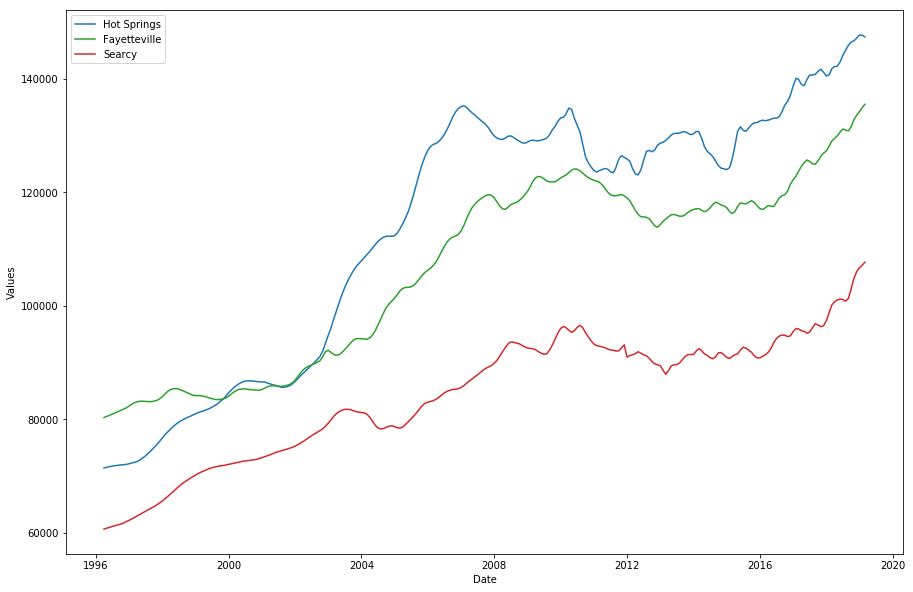

In [6]:
## Explore
plt.figure(figsize=(15,10))
ax = sns.lineplot('Date', 'Values', label = 'Hot Springs',data= df_metro.query("Metro == 'Hot Springs'"))
ax = sns.lineplot('Date', 'Values', label = 'Little Rock',data= df_metro.query("Metro == 'Little Rock'"))
ax = sns.lineplot('Date', 'Values', label = 'Fayetteville',data= df_metro.query("Metro == 'Fayetteville'"))
ax = sns.lineplot('Date', 'Values', label = 'Searcy',data= df_metro.query("Metro == 'Searcy'"))
plt.show()

In [8]:
##
df_metro.head()

,Unnamed: 0,Date,Metro,SizeRank,Values
0,0,1996-04-01,Aberdeen,10561.800000,95900.000000
1,1,1996-04-01,Abilene,7929.900000,63090.000000
2,2,1996-04-01,Ada,8223.500000,42700.000000
3,3,1996-04-01,Adrian,10549.400000,46040.000000
4,4,1996-04-01,Akron,7082.487179,100986.111111


In [9]:

# SCRUB
# Rename column for clarity

df_metro = df_metro.rename(index=str, columns={"Date": "ds", "Values":"y"})
df_metro.head()

,Unnamed: 0,ds,Metro,SizeRank,y
0,0,1996-04-01,Aberdeen,10561.800000,95900.000000
1,1,1996-04-01,Abilene,7929.900000,63090.000000
2,2,1996-04-01,Ada,8223.500000,42700.000000
3,3,1996-04-01,Adrian,10549.400000,46040.000000
4,4,1996-04-01,Akron,7082.487179,100986.111111


In [11]:

# MODEL
# Set the uncertainty interval to 95% (the Prophet default is 80%)

model = Prophet(interval_width=0.95)
model.fit(df_metro[df_metro['Metro'] == 'Hot Springs'])

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:

future_dates = model.make_future_dataframe(periods=10, freq='m')
future_dates.tail()

,ds
281,2019-08-31
282,2019-09-30
283,2019-10-31
284,2019-11-30
285,2019-12-31


In [13]:

# MODEL

forecast = model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
281,2019-08-31,148369.249465,144579.920528,152234.528020
282,2019-09-30,149377.395433,145501.484809,153508.538875
283,2019-10-31,150060.541750,146100.746812,153948.545422
284,2019-11-30,149955.886740,145877.071158,153806.716379
285,2019-12-31,149704.469413,145725.400206,153883.657122


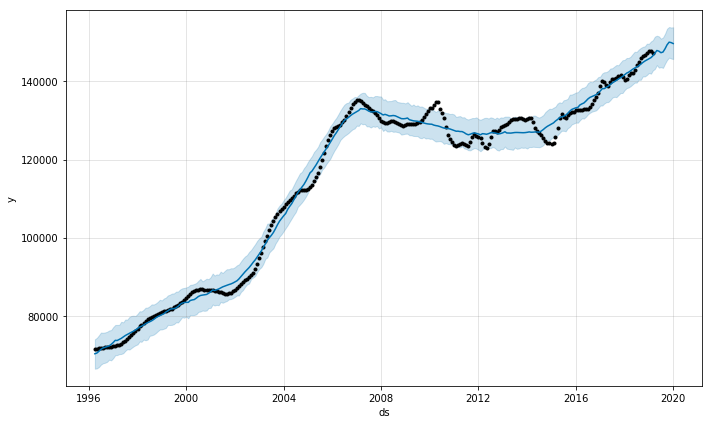

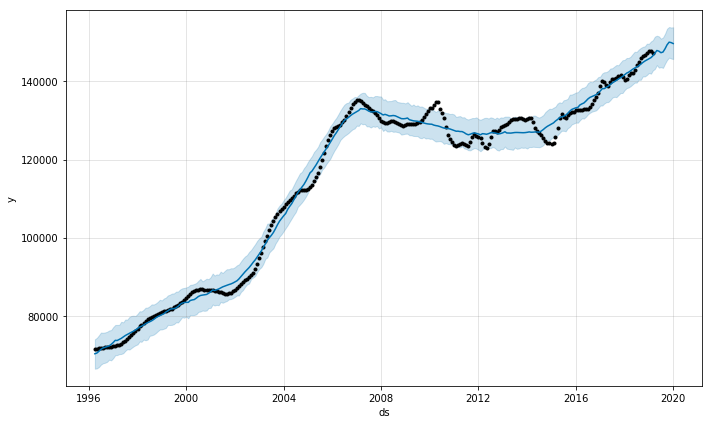

In [15]:
# MODEL

model.plot(forecast, uncertainty=True)

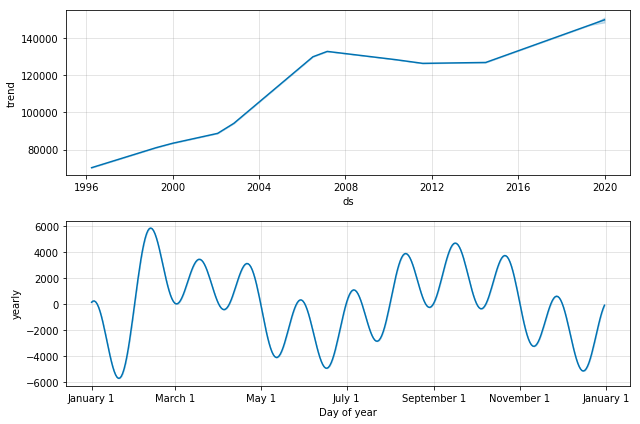

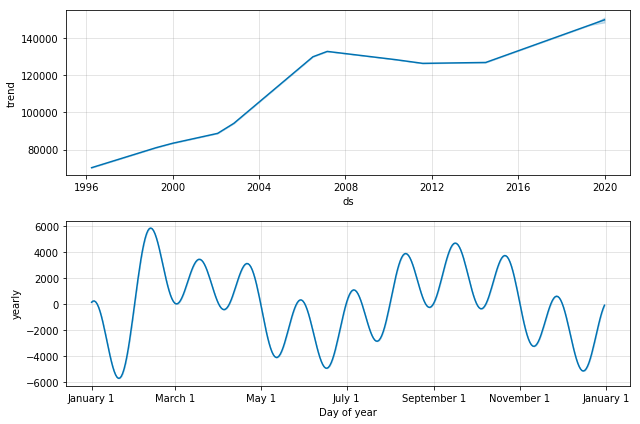

In [16]:

# INTERPRET

model.plot_components(forecast)

In [0]:
def run_prophet(df):
  print('='*50)
  print("Fitting Model")
  print("="*50)
  model = Prophet(interval_width=0.95)
  model.fit(df)
  print("="*50)
  print("Predicting future dates in an interval of 10 at a monthly frequency")
  print("="*50)
  future_dates = model.make_future_dataframe(periods=10, freq='m')
  print("="*50)
  print("Tail of the feature dates")
  print(future_dates.tail())
  print("="*50)
  print("Forcasting")
  forecast = model.predict(future_dates)
  print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
  print("="*50)
  model.plot(forecast, uncertainty=True)
  plt.show()
  print("="*50)
  print("INTERPRET")
  model.plot_components(forecast)
  plt.show()
  

In [19]:
## get metro
metro = df_metro['Metro'].unique()
metro = list(metro)
metro[:5]

['Aberdeen', 'Abilene', 'Ada', 'Adrian', 'Akron']

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Aberdeen Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  196288.345931  183173.188076  209222.417358
282 2019-09-30  198424.709750  184707.716017  211835.677031
283 2019-10-31  199964.357883  186522.948785  214140.321352
284 2019-11-30  200258.339813  187197.551247  213599.468606
285 2019-12-31  199948.716574  186167.617428  214018.982159


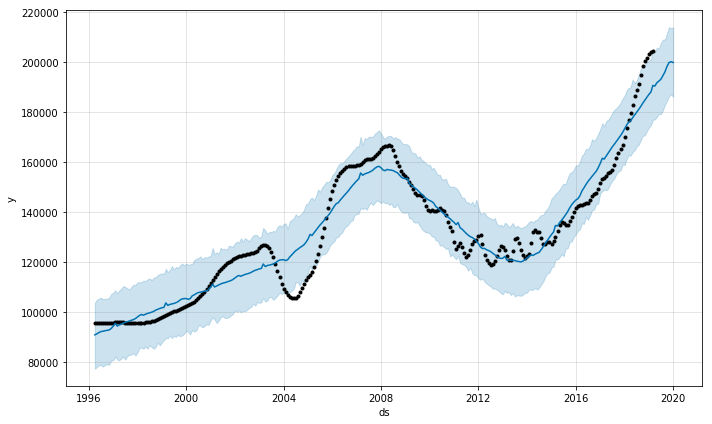

INTERPRET


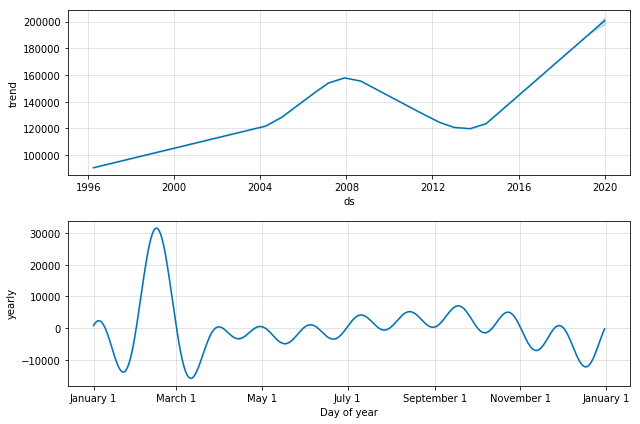

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Abilene Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  138076.291437  136534.310556  139665.988760
282 2019-09-30  139016.316667  137455.150816  140533.070960
283 2019-10-31  139632.951719  137875.537838  141294.642843
284 2019-11-30  139791.103918  137921.040072  141531.991946
285 2019-12-31  139975.504195  138052.769469  141886.462554


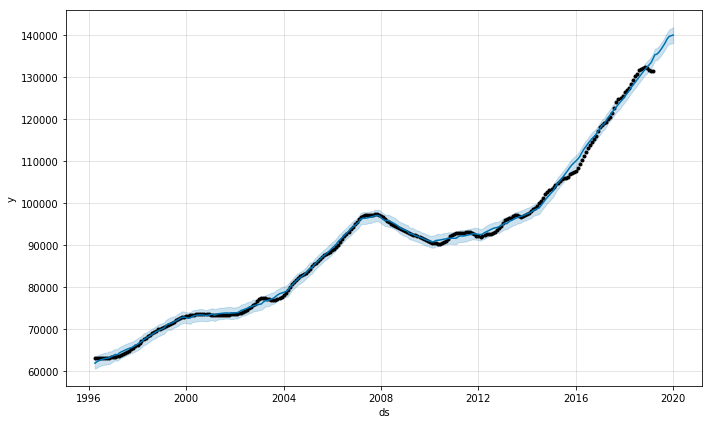

INTERPRET


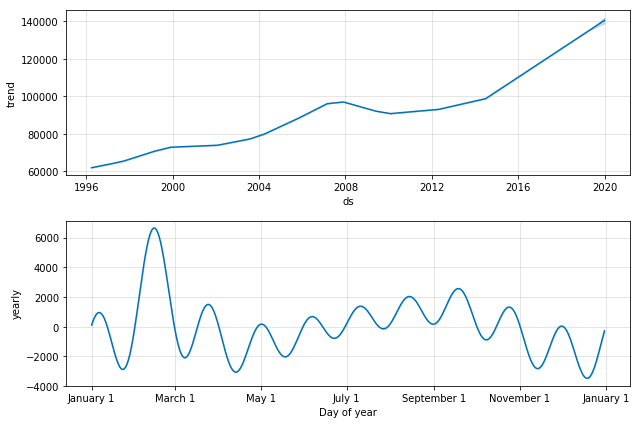

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Ada Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat    yhat_lower     yhat_upper
281 2019-08-31  100513.549363  96390.303898  104836.766715
282 2019-09-30  100947.305898  96328.592311  105702.634535
283 2019-10-31  100969.836868  96689.874830  105282.770919
284 2019-11-30  101069.969663  96567.955060  105600.195863
285 2019-12-31  101351.151958  96791.459339  105550.733371


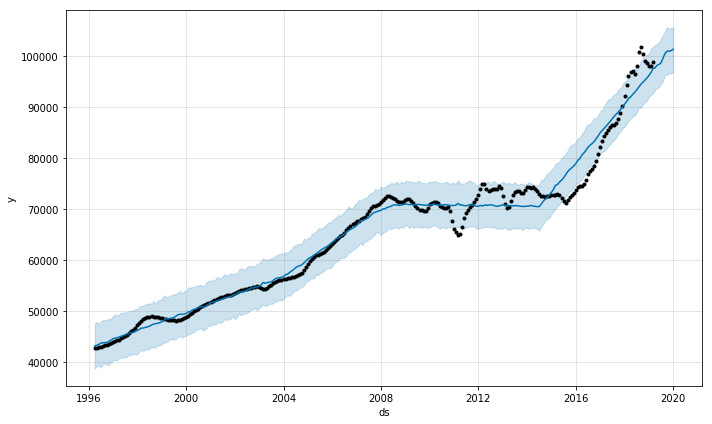

INTERPRET


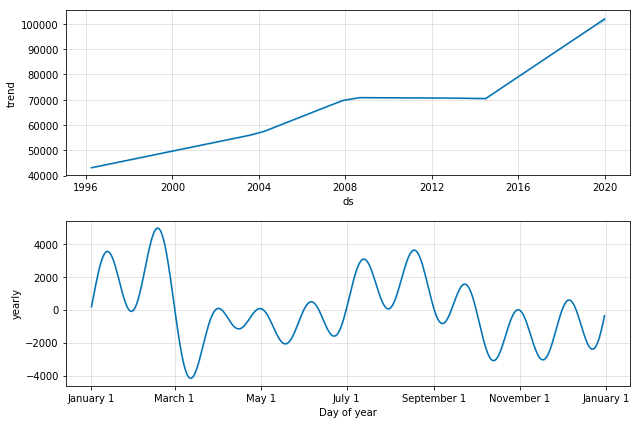

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Adrian Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  149763.750981  141619.860063  158134.227226
282 2019-09-30  150583.411503  142990.075658  158788.827336
283 2019-10-31  150835.690958  143366.872553  158726.398286
284 2019-11-30  150705.086046  142327.527054  158605.335758
285 2019-12-31  150710.634475  142236.454277  158574.862478


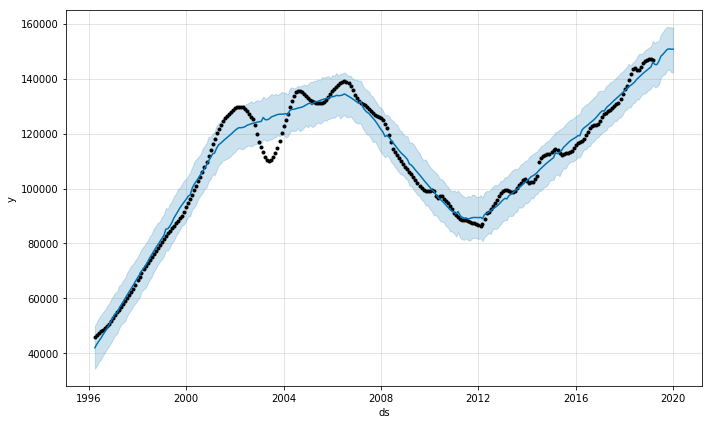

INTERPRET


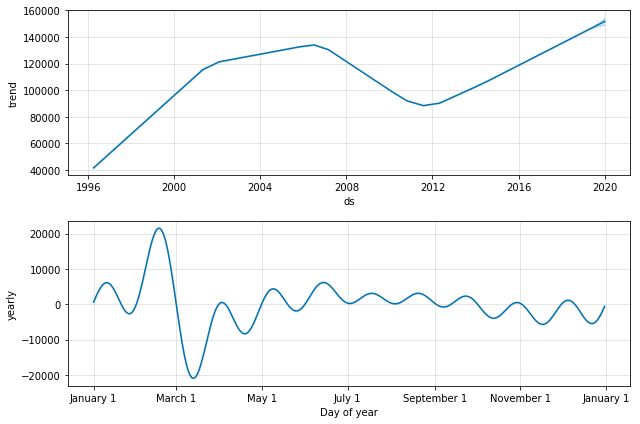

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Akron Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  163931.562853  161582.433583  166324.931595
282 2019-09-30  164581.172045  162000.705280  167248.596086
283 2019-10-31  165072.101041  162574.029783  167680.656595
284 2019-11-30  165292.119664  162661.274782  168058.473702
285 2019-12-31  165450.627019  163012.386440  168155.469089


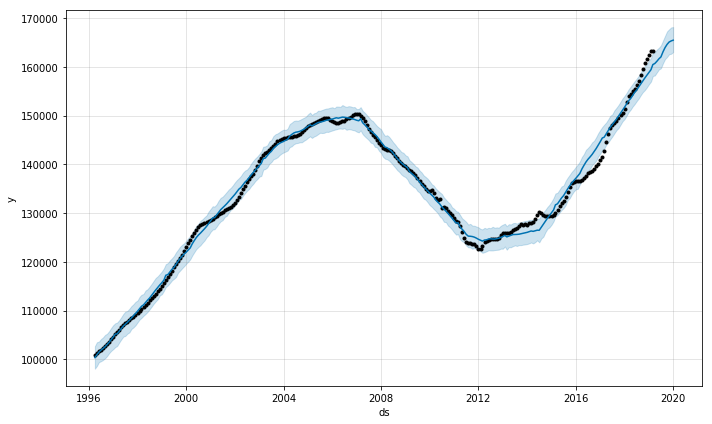

INTERPRET


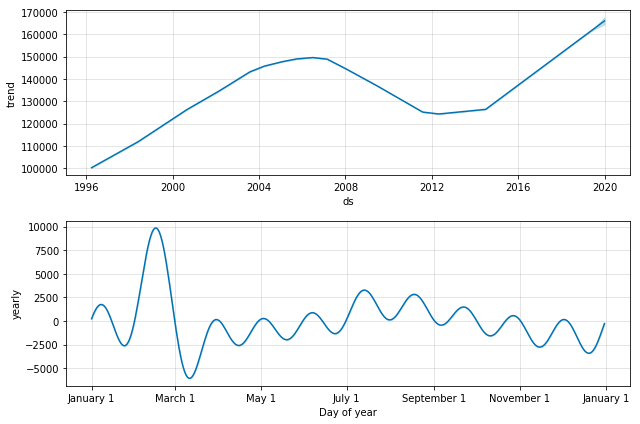

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Alamogordo Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds          yhat    yhat_lower     yhat_upper
281 2019-08-31  97003.048365  89780.089665  105148.564674
282 2019-09-30  97255.117198  89550.142030  104478.158356
283 2019-10-31  97331.497026  89559.610683  104823.375268
284 2019-11-30  97212.864103  88921.009740  104042.080477
285 2019-12-31  96835.267352  88990.410824  104438.042044


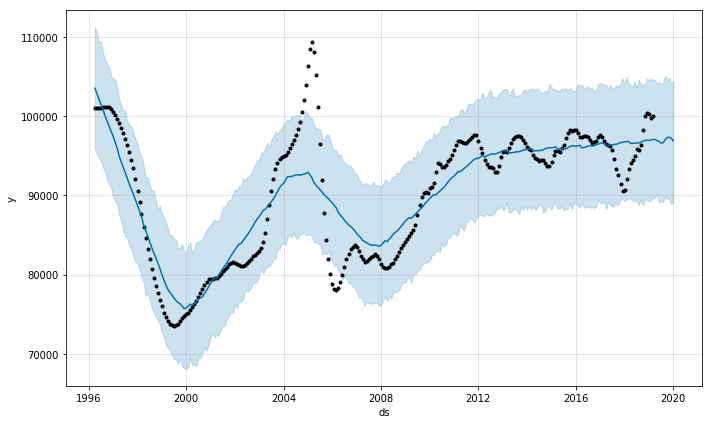

INTERPRET


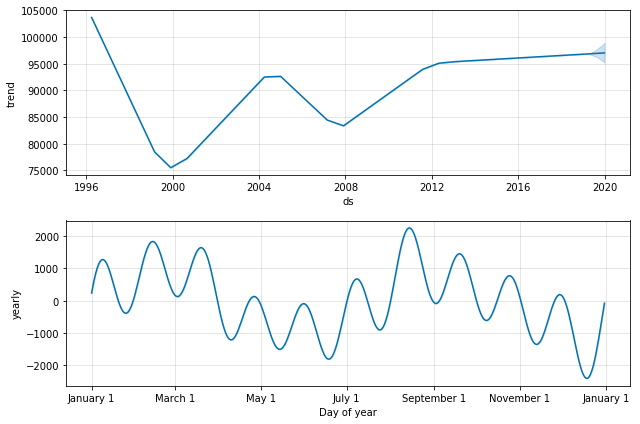

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Albany Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  201259.409583  197800.190538  204712.880245
282 2019-09-30  202399.356240  198378.776160  206355.685886
283 2019-10-31  203483.191234  199611.071624  207667.280480
284 2019-11-30  204588.306277  200278.569176  208785.539141
285 2019-12-31  205863.626715  201591.216372  210444.657760


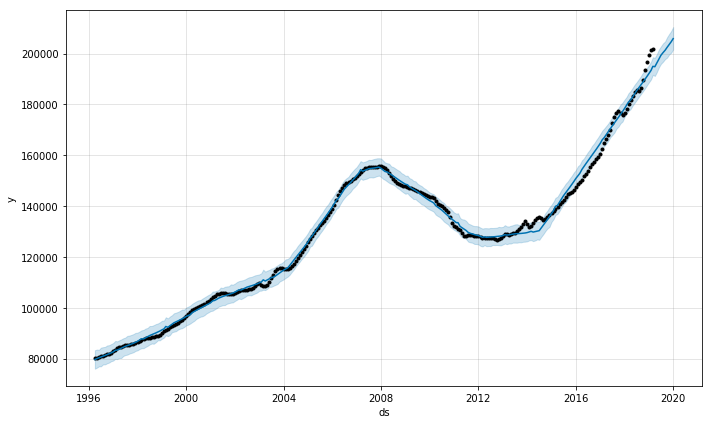

INTERPRET


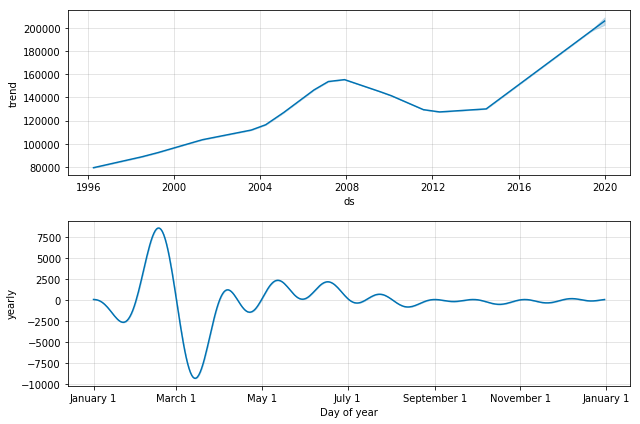

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Albany-Schenectady-Troy Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  210127.720215  207315.663743  213095.126468
282 2019-09-30  210834.637711  208010.146154  213959.675047
283 2019-10-31  211292.299427  208058.366768  214868.331154
284 2019-11-30  211418.262818  208182.079535  215004.316340
285 2019-12-31  211431.203263  207599.157951  215271.438860


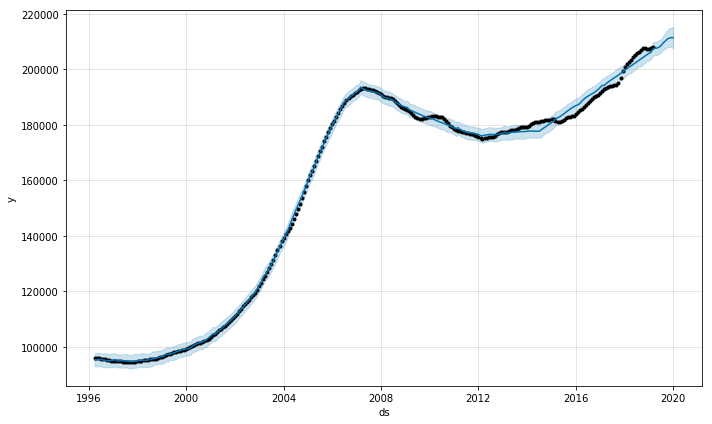

INTERPRET


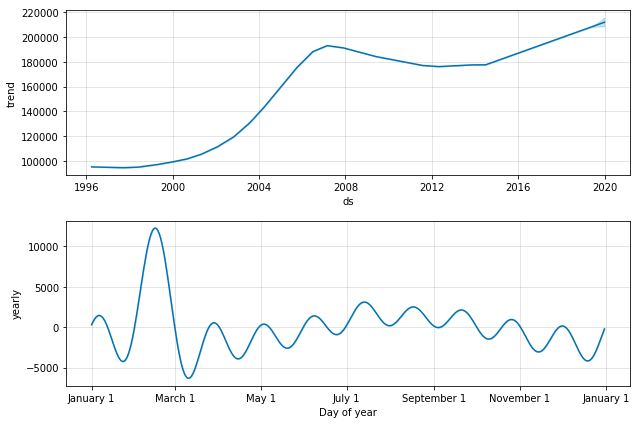

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Albemarle Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  178539.998815  174450.929039  182902.755347
282 2019-09-30  179106.829669  174732.534521  183564.261574
283 2019-10-31  179971.685436  175781.314177  184494.900606
284 2019-11-30  180525.709672  175934.163327  184935.193968
285 2019-12-31  181092.624140  176386.429200  185933.659225


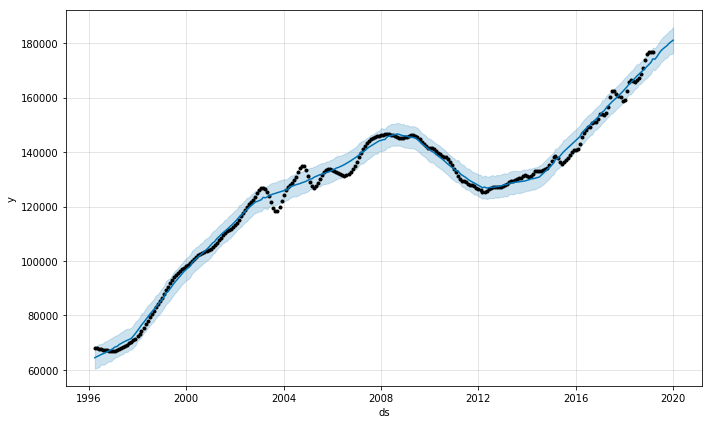

INTERPRET


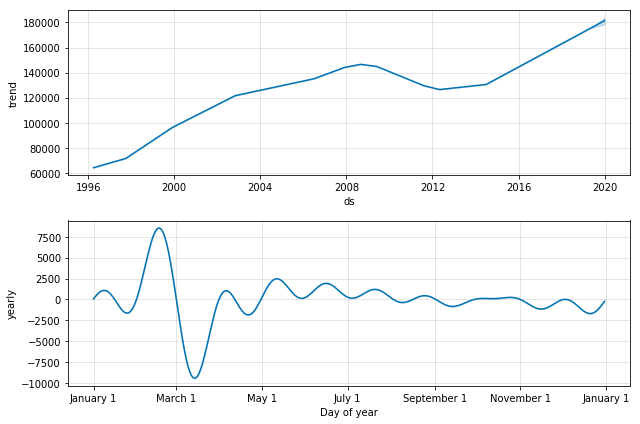

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Albert Lea Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  120196.262255  117158.445309  123587.691668
282 2019-09-30  120865.139164  117516.488813  124224.883539
283 2019-10-31  122559.627214  119338.394744  125819.359365
284 2019-11-30  124075.768568  120528.527257  127852.595785
285 2019-12-31  123303.241102  120053.736438  126613.839060


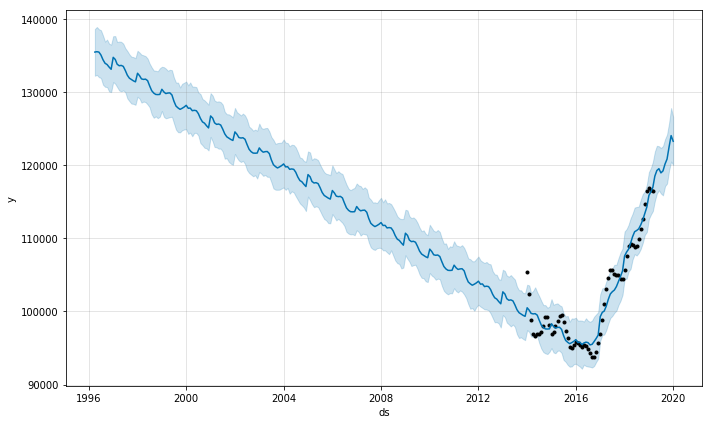

INTERPRET


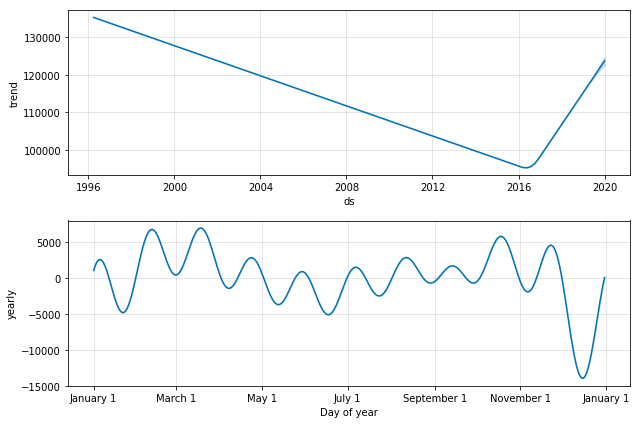

In [21]:
for i in range(10):
  print("#"*50)
  print("{} Metro".format(metro[i]))
  print("#"*50)
  run_prophet(df_metro[df_metro['Metro']== metro[i]])

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Albertville Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds          yhat    yhat_lower     yhat_upper
281 2019-08-31  90327.535704  68102.431359  114146.091130
282 2019-09-30  90245.932914  66258.628155  113579.841723
283 2019-10-31  90247.953687  66995.688366  112390.071499
284 2019-11-30  90070.450218  66631.593570  113292.293124
285 2019-12-31  89588.675464  65294.269562  113566.208529


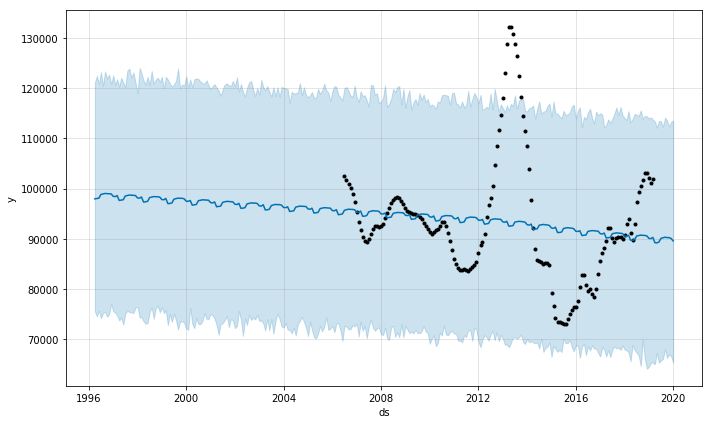

INTERPRET


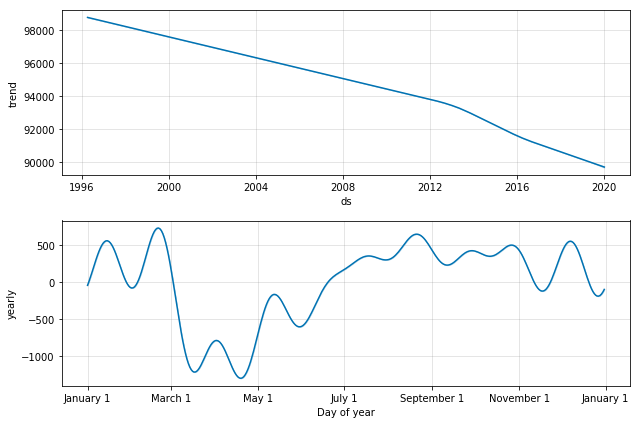

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Allentown-Bethlehem-Easton Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  220456.338535  216248.193747  224772.903717
282 2019-09-30  220972.493491  215956.201764  225302.127637
283 2019-10-31  221969.234575  216940.025218  226392.937397
284 2019-11-30  222789.378850  216850.122781  228217.601002
285 2019-12-31  223221.356007  216990.275198  228417.735877


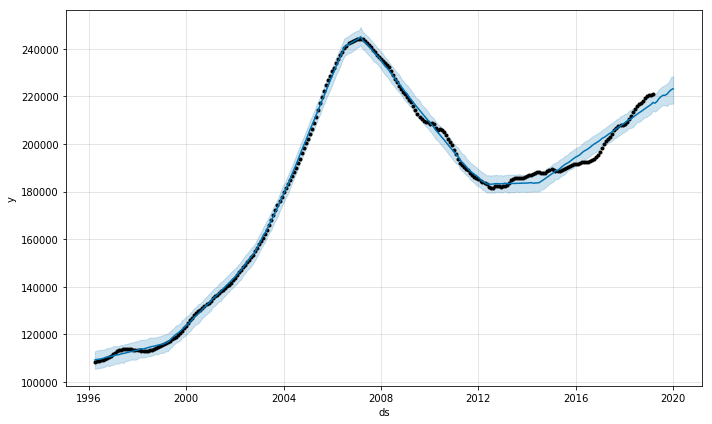

INTERPRET


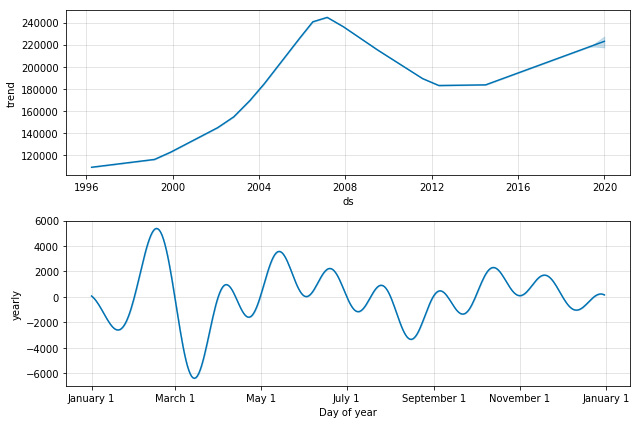

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Amarillo Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  153617.692533  150946.742299  156230.152689
282 2019-09-30  154327.563432  151494.358226  157109.212281
283 2019-10-31  155216.019176  151772.513545  158107.092926
284 2019-11-30  155747.417843  152694.884386  159180.161015
285 2019-12-31  156115.568377  152210.221489  159983.901869


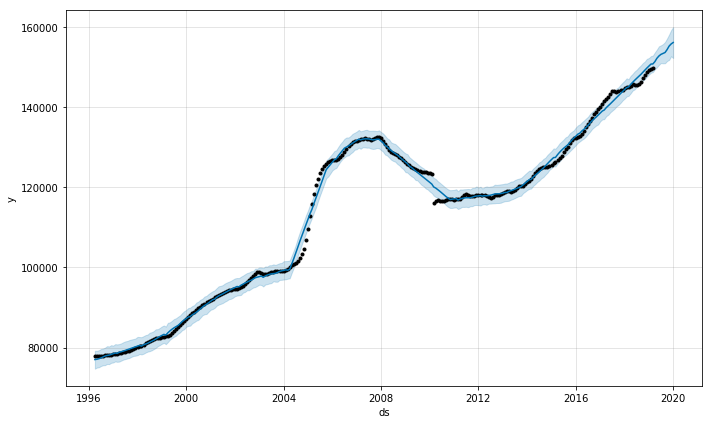

INTERPRET


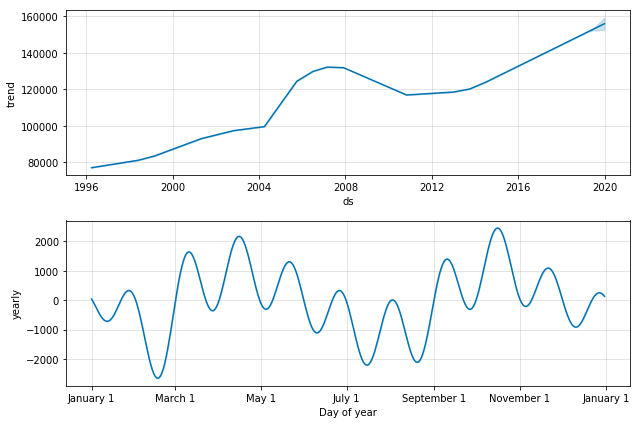

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Angola Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  149797.336176  145400.880722  153825.686319
282 2019-09-30  150539.568784  146411.045296  154491.888655
283 2019-10-31  150985.167193  147174.427147  155432.950778
284 2019-11-30  151542.700928  146849.282016  155366.761208
285 2019-12-31  152585.552869  148217.824310  156714.983536


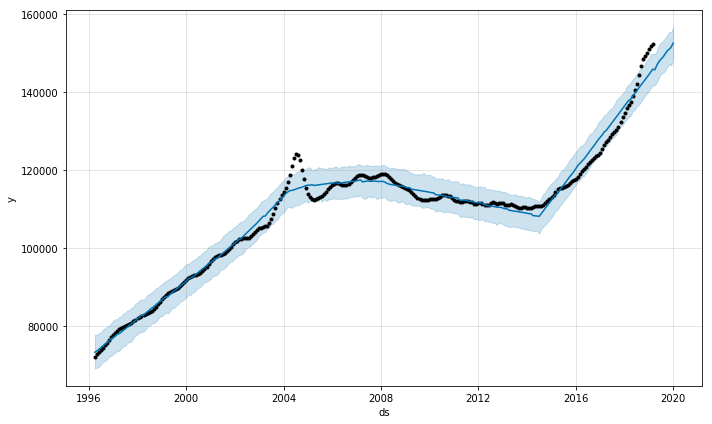

INTERPRET


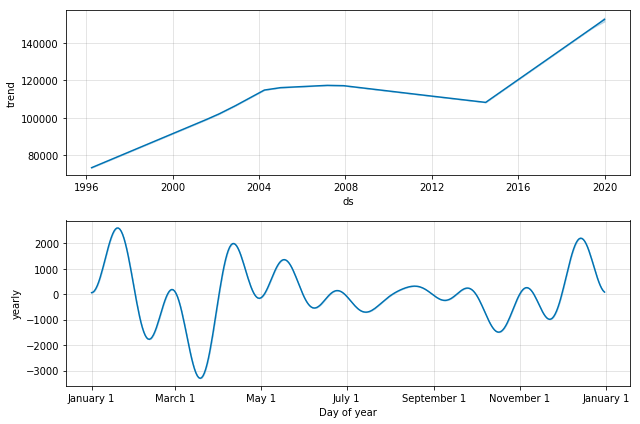

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Arkansas City-Winfield Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds          yhat    yhat_lower     yhat_upper
281 2019-08-31  96696.947425  92154.664647  101448.943010
282 2019-09-30  97276.254898  92537.442408  102227.940723
283 2019-10-31  98120.260130  93265.665379  102846.445570
284 2019-11-30  98822.613039  94005.041479  103746.126130
285 2019-12-31  99434.237521  94845.064676  104166.090267


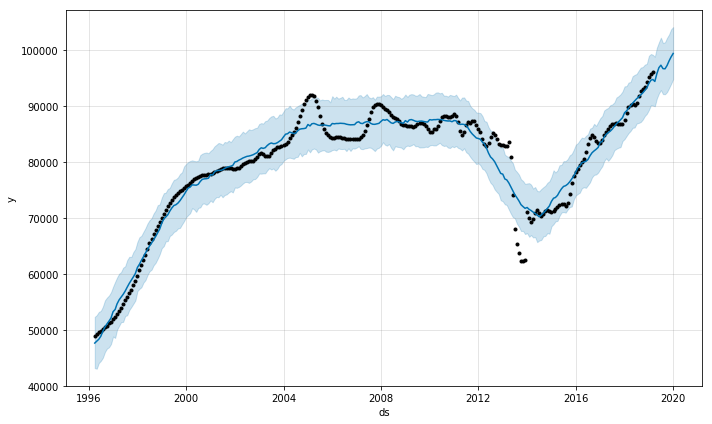

INTERPRET


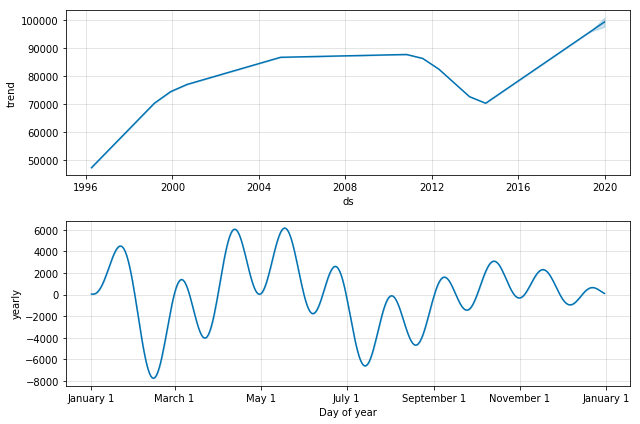

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Atchison Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds          yhat    yhat_lower    yhat_upper
281 2019-08-31  89557.811481  87131.491850  91985.846019
282 2019-09-30  90003.150311  87567.607953  92476.112464
283 2019-10-31  91376.237998  88750.334355  93824.272150
284 2019-11-30  92357.602938  89738.085636  94992.190809
285 2019-12-31  91949.331897  89421.736039  94516.467907


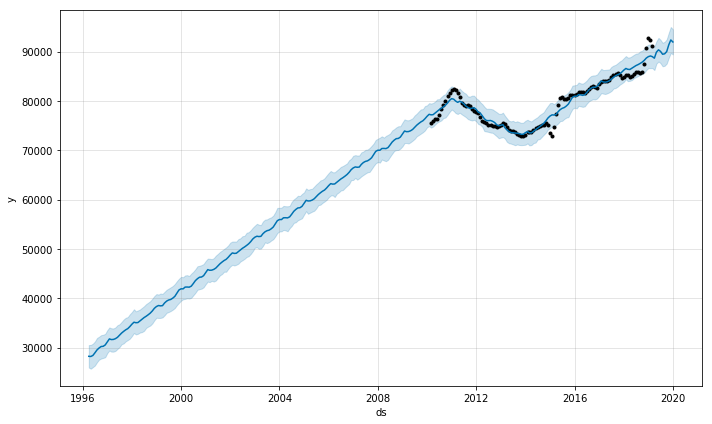

INTERPRET


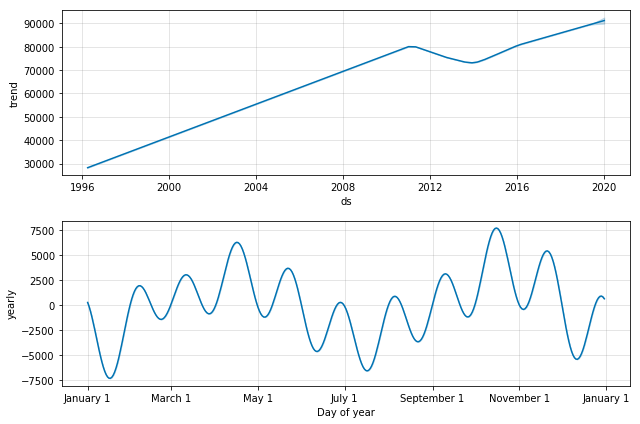

In [22]:
for i in range(10,40,5):
  print("#"*50)
  print("{} Metro".format(metro[i]))
  print("#"*50)
  run_prophet(df_metro[df_metro['Metro']== metro[i]])

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Baraboo Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  211176.551399  207517.856021  215079.114965
282 2019-09-30  212124.806223  208140.284136  215935.568661
283 2019-10-31  212528.703920  208533.533375  216307.330865
284 2019-11-30  212869.569495  208425.870818  216811.631125
285 2019-12-31  213252.922324  209071.148537  217929.719054


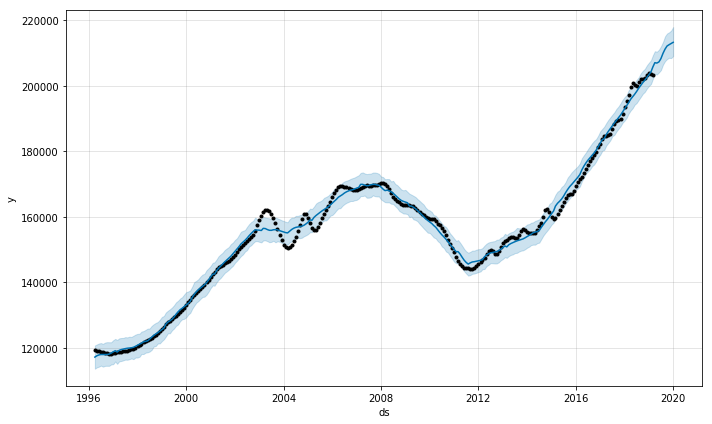

INTERPRET


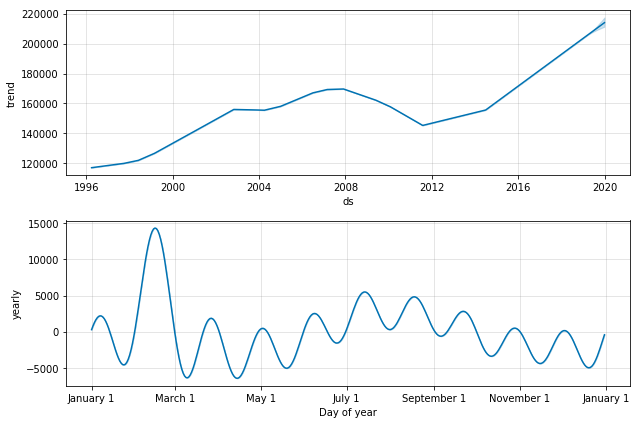

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Bastrop Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds          yhat    yhat_lower    yhat_upper
281 2019-08-31  80975.495078  79709.650344  82255.413178
282 2019-09-30  81346.264676  80118.686613  82550.024171
283 2019-10-31  81582.724756  80378.254659  82918.747815
284 2019-11-30  81797.179553  80451.896426  83186.485222
285 2019-12-31  81975.892237  80513.923397  83436.134506


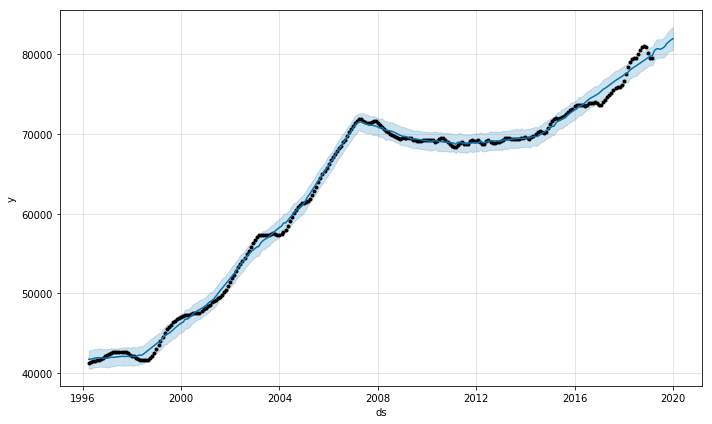

INTERPRET


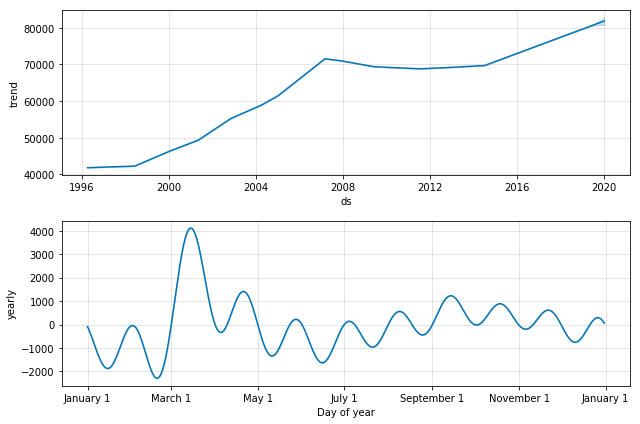

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Bay City Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  139160.747280  134076.806595  144497.581477
282 2019-09-30  140218.474506  135296.495572  145058.202742
283 2019-10-31  140569.053801  135496.154316  146329.057205
284 2019-11-30  140787.259647  135732.450825  145604.182297
285 2019-12-31  141123.886898  135985.616007  146162.993498


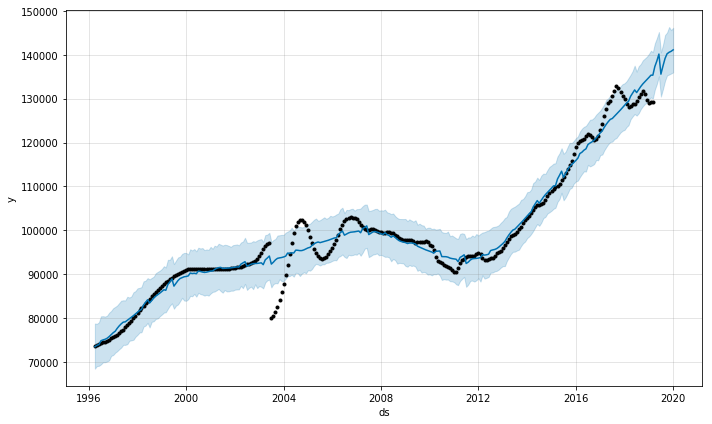

INTERPRET


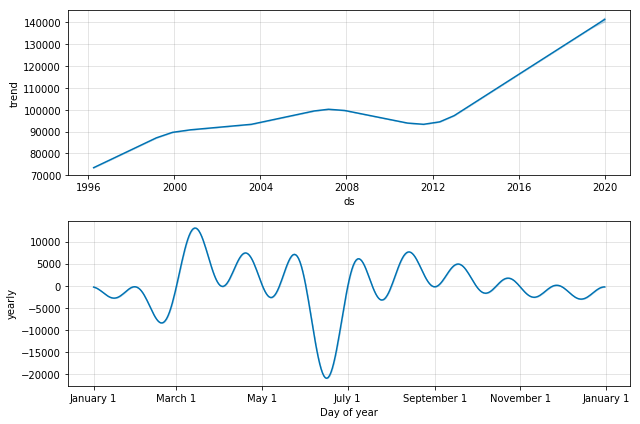

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Bedford Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds          yhat    yhat_lower     yhat_upper
281 2019-08-31  97410.733693  93486.066448  102023.742694
282 2019-09-30  97944.459865  94137.675718  102175.080082
283 2019-10-31  97957.468567  94131.941690  102013.363336
284 2019-11-30  97790.224635  93620.160875  101714.650766
285 2019-12-31  97824.279493  93878.684245  102046.515365


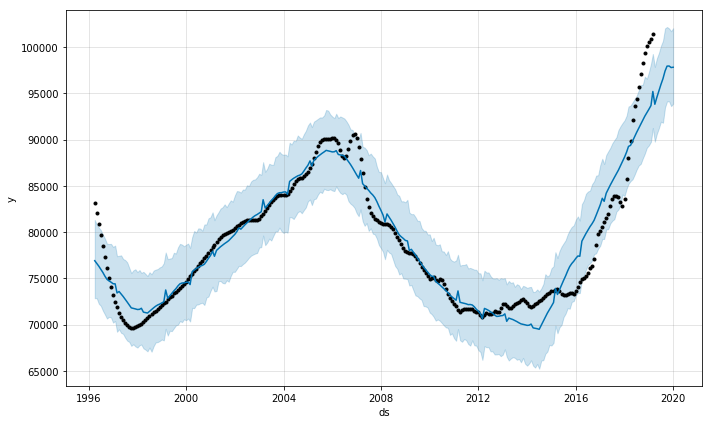

INTERPRET


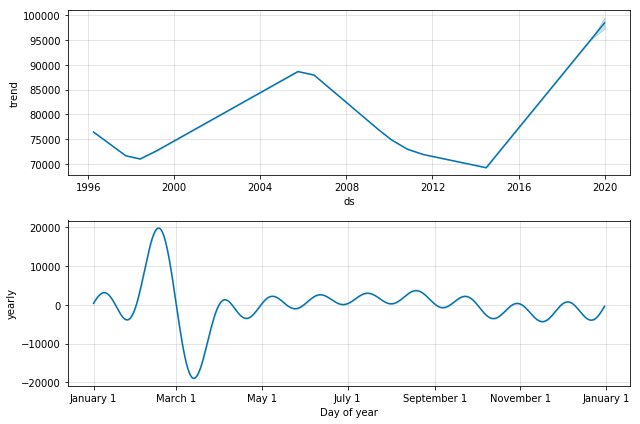

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Bend-Redmond Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  417506.352142  405832.885893  427471.738704
282 2019-09-30  419975.553188  403913.459639  432946.213854
283 2019-10-31  423044.983932  403260.032650  438576.990339
284 2019-11-30  425805.786350  402629.212324  444434.225788
285 2019-12-31  427751.471745  402851.447052  450281.976462


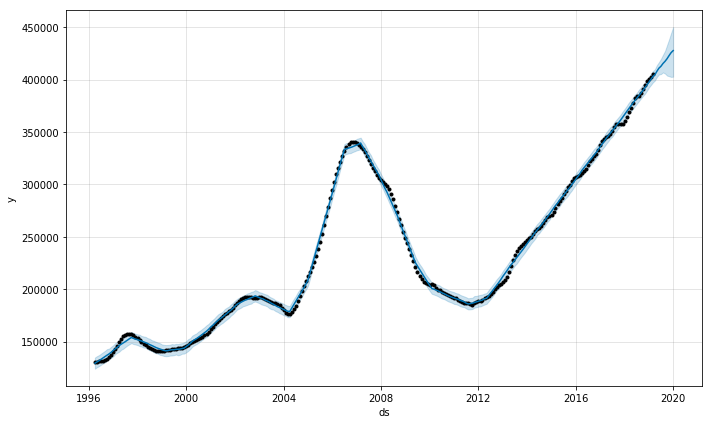

INTERPRET


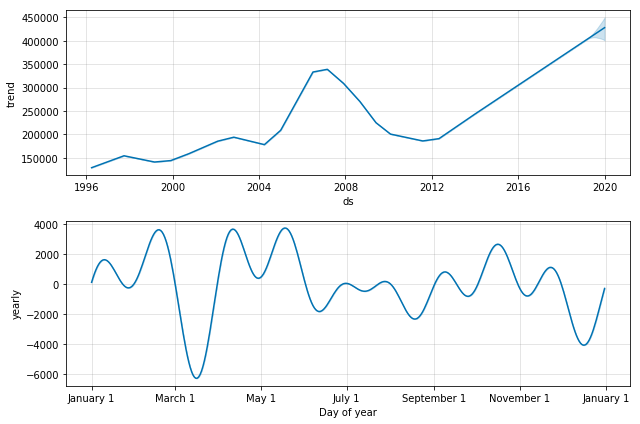

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Birmingham-Hoover Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  188090.868792  185911.354681  190394.611596
282 2019-09-30  188683.723879  186357.667425  190907.056136
283 2019-10-31  189156.870611  186703.532554  191493.543373
284 2019-11-30  189573.245267  186689.216608  191988.117546
285 2019-12-31  190210.306552  187177.160444  193096.069202


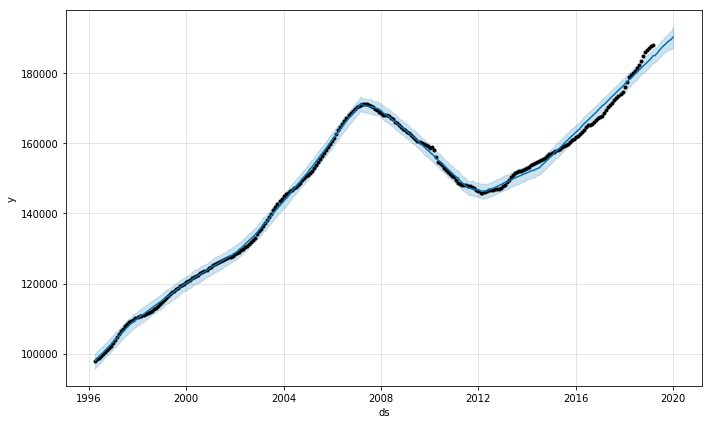

INTERPRET


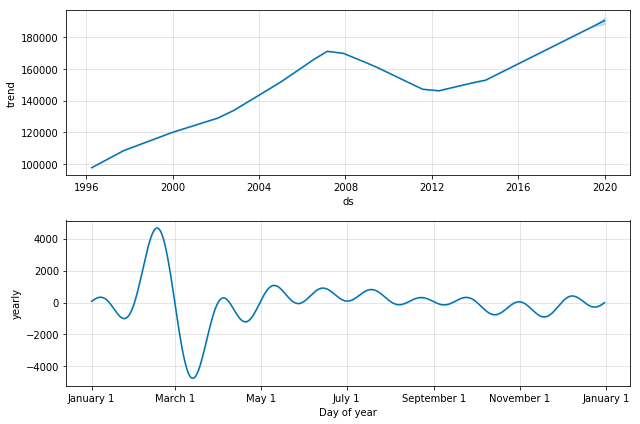

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Bloomsburg-Berwick Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  134413.000152  132422.310650  136511.358700
282 2019-09-30  135269.622316  133125.230057  137362.635753
283 2019-10-31  135616.052931  133504.212009  137725.080461
284 2019-11-30  135708.498493  133405.482950  138182.186451
285 2019-12-31  135747.799603  133232.125157  138236.553785


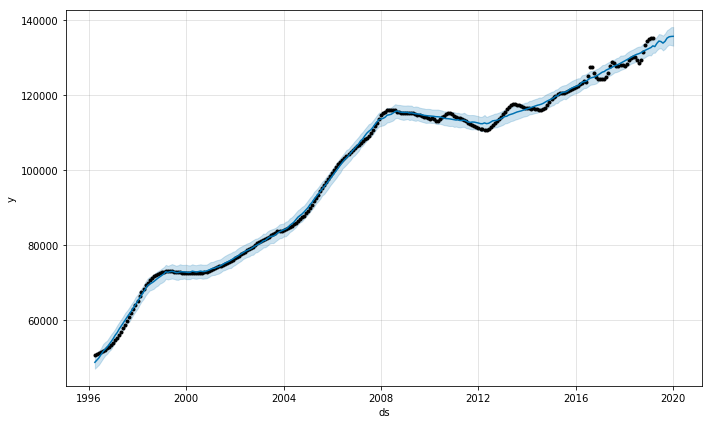

INTERPRET


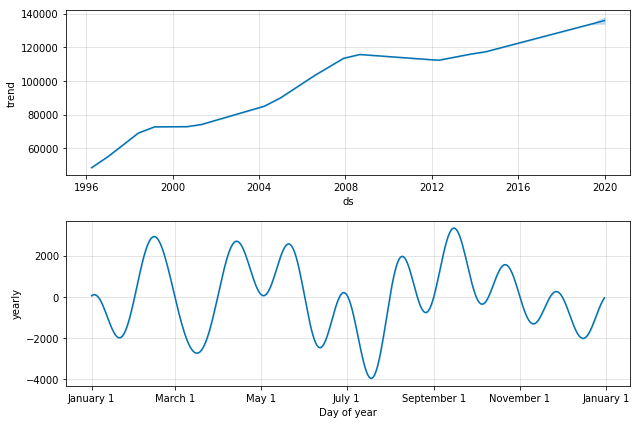

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Boone Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  213957.907816  208183.653128  220094.353229
282 2019-09-30  214478.425420  208380.756507  220467.602886
283 2019-10-31  214600.618870  208553.923919  220762.862104
284 2019-11-30  215053.849096  208910.033272  221314.363548
285 2019-12-31  216920.951388  210346.447011  224145.536342


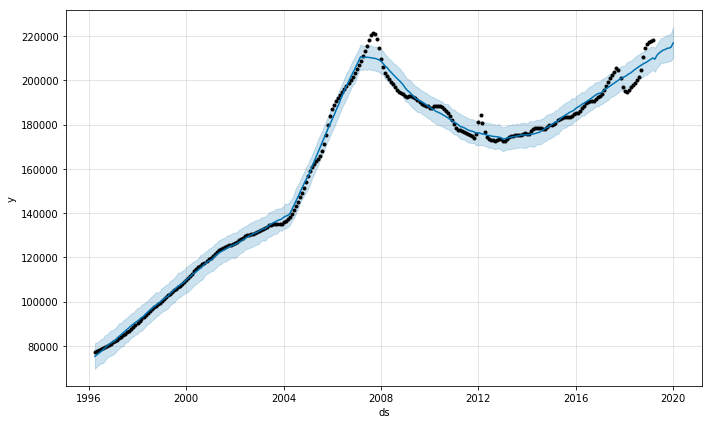

INTERPRET


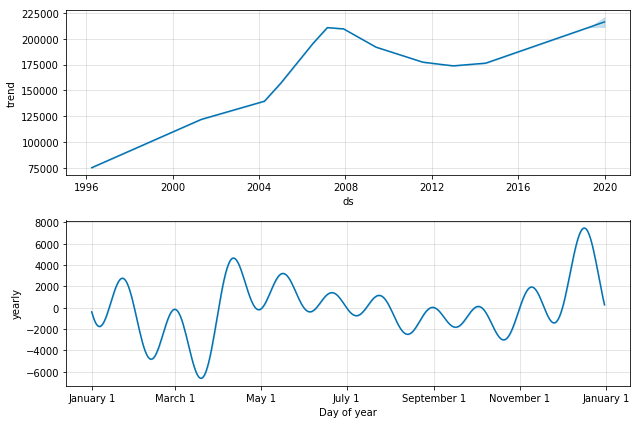

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Bozeman Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  376362.256954  369464.077482  383782.200545
282 2019-09-30  379480.669463  372251.092095  386603.332813
283 2019-10-31  382135.413299  374381.780285  390268.483592
284 2019-11-30  384058.373688  375767.198474  392092.044057
285 2019-12-31  385281.426091  377478.049368  393749.355186


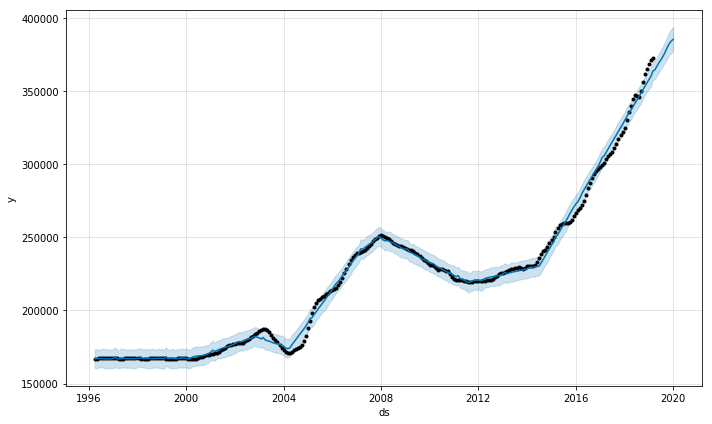

INTERPRET


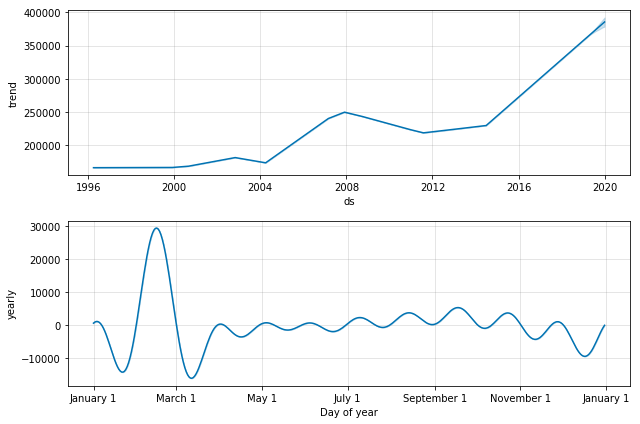

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##################################################
Brenham Metro
##################################################
Fitting Model
Predicting future dates in an interval of 10 at a monthly frequency
Tail of the feature dates
            ds
281 2019-08-31
282 2019-09-30
283 2019-10-31
284 2019-11-30
285 2019-12-31
Forcasting
            ds           yhat     yhat_lower     yhat_upper
281 2019-08-31  197214.866024  195059.902352  199389.143229
282 2019-09-30  198080.912494  195679.873177  200430.570883
283 2019-10-31  199081.168900  196656.846813  201577.514484
284 2019-11-30  200094.302965  197422.361399  202791.808228
285 2019-12-31  201465.963361  199023.210906  204717.103938


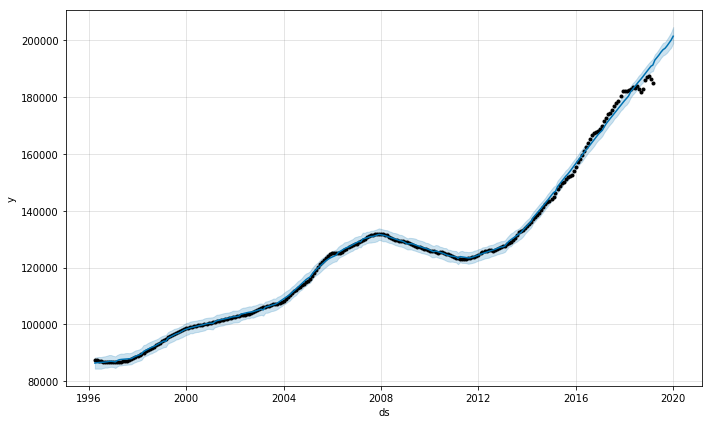

INTERPRET


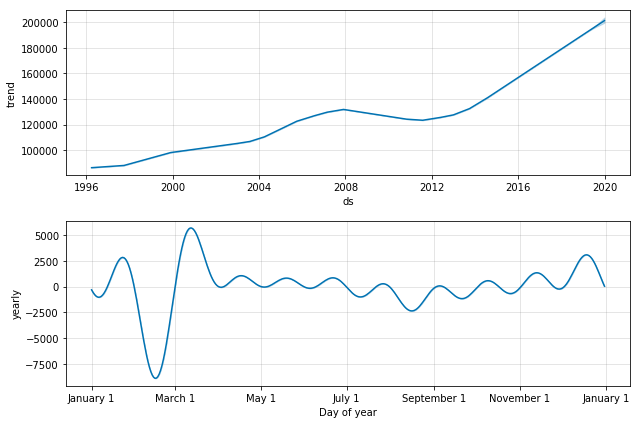

In [23]:
for i in range(50,100,5):
  print("#"*50)
  print("{} Metro".format(metro[i]))
  print("#"*50)
  run_prophet(df_metro[df_metro['Metro']== metro[i]])